In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline

predicted_counts = pd.read_csv('https://raw.githubusercontent.com/olgabot/seaborn_factorplot_pointplot_valueerror/master/predicted_counts.csv')
predicted_counts.head()

,Original Modality,Predicted Modality,Noise,Features,Percent of Features
0,bimodal,bimodal,0,1,100
1,bimodal,bimodal,10,100,100
2,bimodal,bimodal,20,100,100
3,bimodal,bimodal,30,69,69
4,bimodal,bimodal,40,12,12


## No error with `kind="bar"`

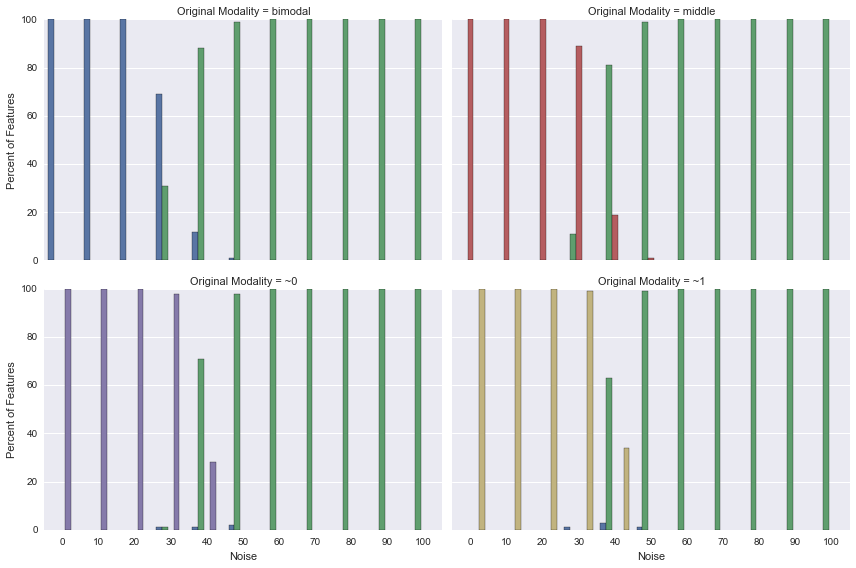

In [11]:
g = sns.factorplot(x='Noise', hue='Predicted Modality', y='Percent of Features', 
               col='Original Modality', 
               data=predicted_counts, kind='bar', 
                   col_wrap=2, 
                   aspect=1.5, legend=False)

## `kind="point"` gives a `ValueError`

In [12]:
g = sns.factorplot(x='Noise', hue='Predicted Modality', y='Percent of Features', 
               col='Original Modality', 
               data=predicted_counts, kind='point', 
                   col_wrap=2, 
#                hue_order=MODALITY_ORDER, 
#                palette=MODALITY_PALETTE, 
                   aspect=1.5, legend=False)

ValueError: Collections can only map rank 1 arrays

## `FacetGrid` + mapping `pointplot` don't plot the full extent of the x-axis

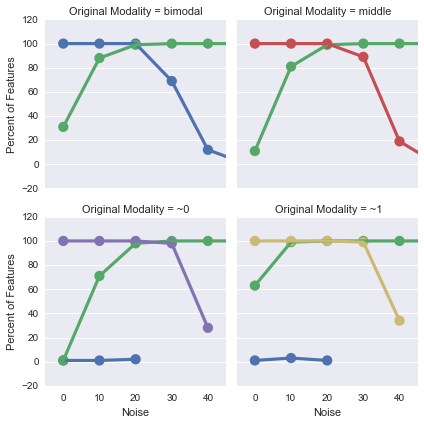

In [13]:
g = sns.FacetGrid(predicted_counts, col='Original Modality', hue="Predicted Modality", col_wrap=2)
g.map(sns.pointplot, 'Noise', 'Percent of Features')

### Manually set `xlim=(0, 100)` (the true xlim)

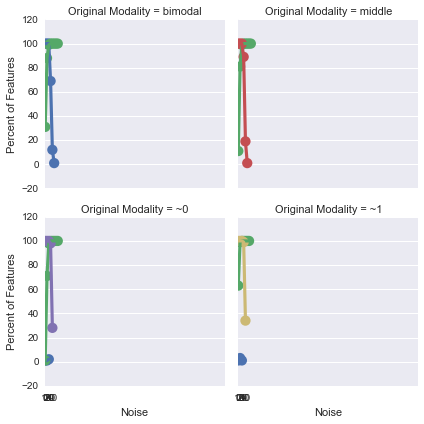

In [14]:
g = sns.FacetGrid(predicted_counts, col='Original Modality', hue="Predicted Modality", col_wrap=2)
g.map(sns.pointplot, 'Noise', 'Percent of Features')
g.set(xlim=(0, 100))